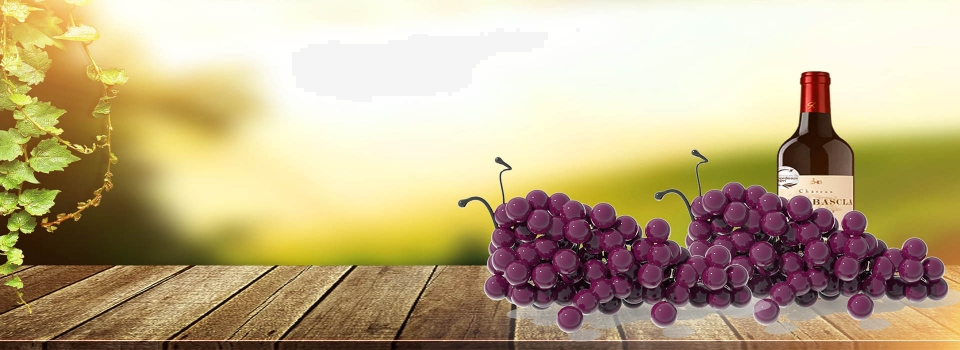

#### 1) Construya 2 datasets, uno con los datos originales y otro con los datos correctamente escalados y/o normalizados. Divida ambos datasets en conjuntos de entrenamiento y de validación.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_wine

np.random.seed(1234)

#1 Construyo el primer dataset con los datos originales

wine=load_wine(return_X_y=False, as_frame=False)
vinos=pd.DataFrame(wine.data,columns=wine.feature_names,)
vinos["class"]=wine.target_names[wine.target]


In [2]:
#2 Establezco el conjunto de entrenamiento y de prueba del dataset original
x = np.array(wine.data[:,:13])
y = np.array(wine.target) # NOTA: Conservo dimensiones originales

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=2)
x_train=x[:len(x_train)].reshape(len(x_train),13)
x_train=pd.DataFrame(x_train,columns=wine.feature_names)



In [3]:
#3 Construyo el segundo dataset con los datos normalizados

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_vinos = scaler.fit_transform(vinos.iloc[:,:13])
scaled_vinos = pd.DataFrame(scaled_vinos)
scaled_vinos["class"]=vinos["class"]
scaled_vinos.columns=vinos.columns 


### 2) Elija un valor de K y aplique el algoritmo de KNN en ambos datasets. Evalúe la precisión en ambos casos.

In [4]:
#5 Establezco conjuntos de entrenamiento y prueba del dataset normalizado

x_scaled = scaled_vinos.iloc[:,:13]
y_scaled = y

x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y_scaled,test_size=0.20,random_state=2)
x_train_scaled=x[:len(x_train_scaled)].reshape(len(x_train_scaled),13)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=wine.feature_names)


C:\Users\pfard\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pfard\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[0.3611111111111111, 0.3333333333333333, 0.3333333333333333, 0.3055555555555556, 0.2777777777777778, 0.2222222222222222, 0.1388888888888889, 0.19444444444444445, 0.2222222222222222]


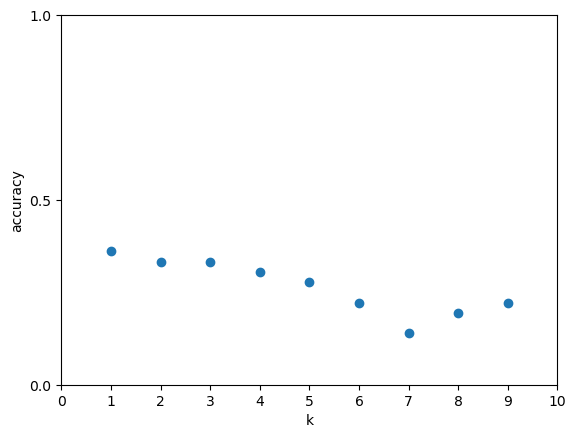

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Evalúo para un rango de 10 valores de k cual es el valor que optimiza la precisión del modelo.

k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train.values,y_train) 
    scores.append(knn.score(x_test,y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0.0,0.5,1.0])

print(scores)



###  Se observa que la mejor precisión del modelo se alcanza con K=1 donde Accuracy = 36 %


C:\Users\pfard\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pfard\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[0.3611111111111111, 0.3333333333333333, 0.3333333333333333, 0.3055555555555556, 0.2777777777777778, 0.2222222222222222, 0.1388888888888889, 0.19444444444444445, 0.2222222222222222]


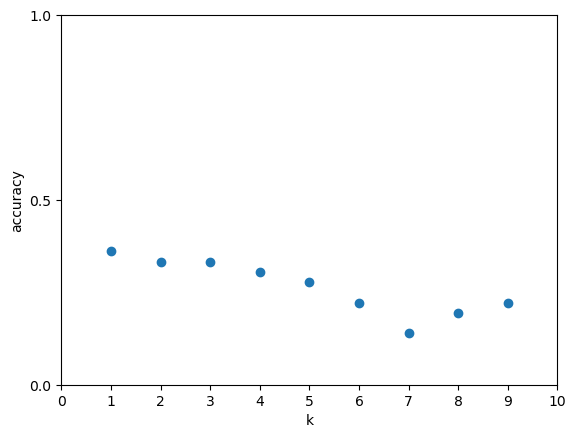

In [20]:
# Analizo el valor óptimo de k ahora para el dataset escalado.

k_range = range(1, 10)
scores = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train_scaled.values,y_train)
    scores.append(knn.score(x_test,y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0.0,0.5,1.0])

print(scores)



### *Con el conjunto de entrenamiento escalado tambien se obtiene que la mejor precisión será con k=1 logrando una precisión del 36.1 %.*

### 3) Elija un valor de max_depth y aplique el algoritmo de Árboles de Decisión en ambos datasets. Evalúe la precisión en ambos casos.

#### 3.1) Análisis con datos originales

[0.25, 0.3055555555555556, 0.3888888888888889, 0.4166666666666667, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3055555555555556, 0.3333333333333333, 0.3333333333333333]


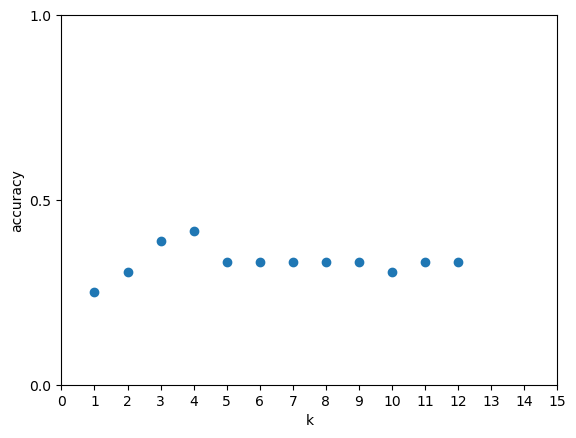

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

## Primero busco el valor óptimo de MaxDepth para optimizar el valor de la precisión.

k_range = range(1,13)
scores = []

for k in k_range:
    
     arbol=DecisionTreeClassifier(max_depth=k, random_state=2)  
     arbol.fit(x_train.values,y_train)
     scores.append(arbol.score(x_test,y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.yticks([0.0,0.5,1.0])

print(scores)



###  Se observa que la mejor precisión se obtiene con un MaxDepth = 4 obteniendo una precisión de 41.7  %

In [8]:
arbol_optimo=DecisionTreeClassifier(max_depth=4)
arbol_optimo.fit(x_train.values,y_train)
arbol_optimo.score(x_test,y_test)

0.4166666666666667

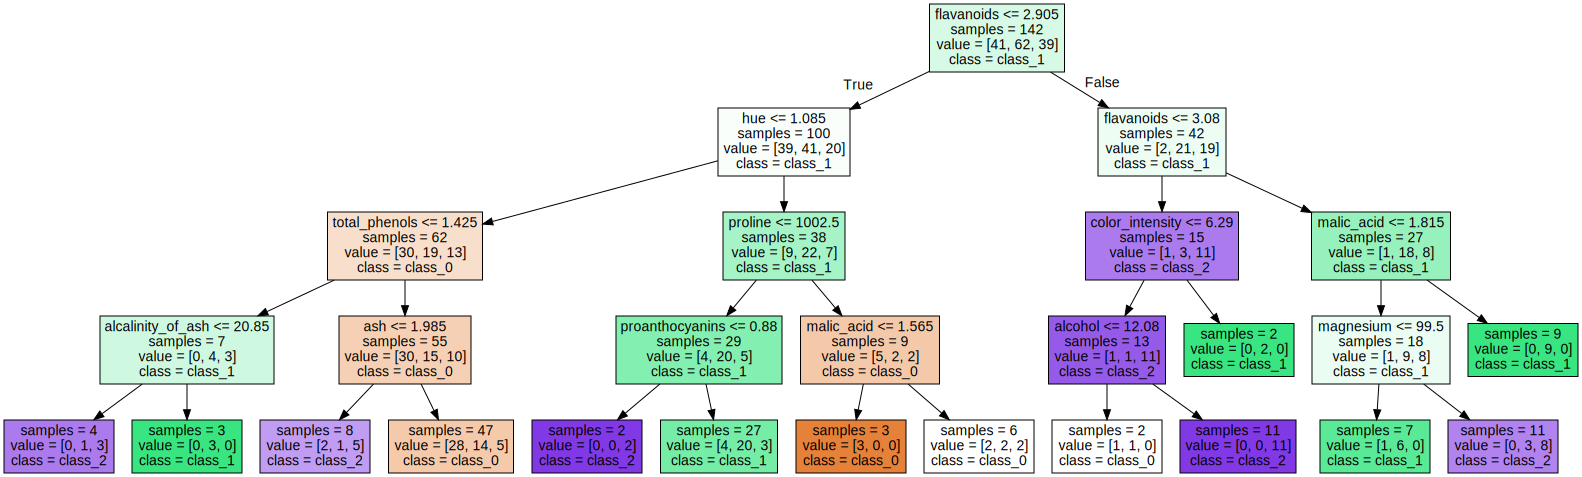

In [9]:
# Grafico el arbol de decisión

import os
os.environ["PATH"]+= os.pathsep + 'C:\Program Files(x86)\Graphviz2.38\bin'
export_graphviz(arbol_optimo, out_file='arbol1.dot', class_names=wine.target_names, feature_names=wine.feature_names, impurity=False, filled=True)

with open('arbol1.dot') as f:
 dot_graph=f.read()
graphviz.Source(dot_graph)

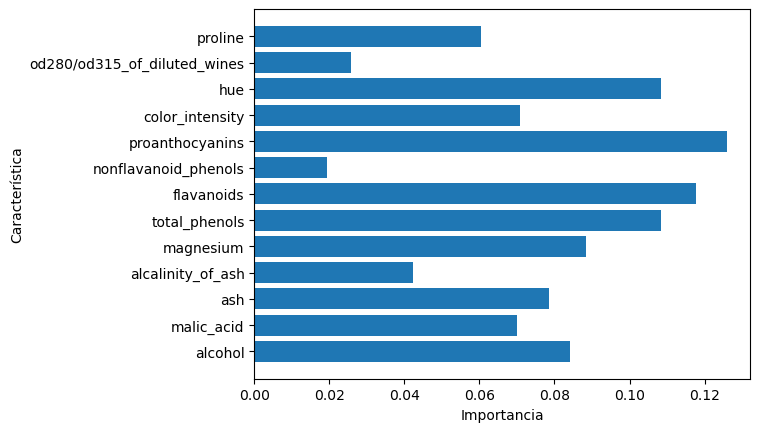

In [10]:
# Evalúo la importancia que el modelo otorga a cada feature

caracteristica=wine.data.shape[1]
plt.barh(range(caracteristica),arbol.feature_importances_)
plt.yticks(np.arange(caracteristica),wine.feature_names)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

#### 3.2) Análisis con datos escalados


[0.25, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]


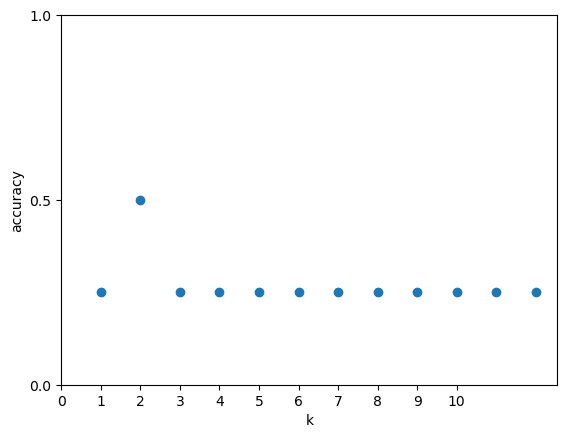

In [23]:
## Primero busco el valor óptimo de MaxDepth para optimizar el valor de la precisión.

k_range = range(1,13)
scores = []

for k in k_range:
    
     arbol=DecisionTreeClassifier(max_depth=k, random_state=2) 
     arbol.fit(x_train_scaled,y_train_scaled)
     scores.append(arbol.score(x_test_scaled,y_test_scaled))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0.0,0.5,1.0])

print(scores)


### Se observa que para los datos escalados el valor óptimo de Max depth es 2 y la precisión es 50 %. 

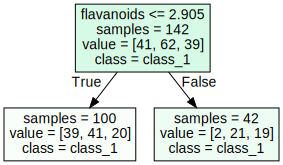

In [24]:
arbol_optimo_scaled=DecisionTreeClassifier(max_depth=1)
arbol_optimo_scaled.fit(x_train_scaled,y_train_scaled)
arbol_optimo_scaled.score(x_test_scaled,y_test_scaled)

# Grafico el arbol de decisión

import os
os.environ["PATH"]+= os.pathsep + 'C:\Program Files(x86)\Graphviz2.38\bin'
export_graphviz(arbol_optimo_scaled, out_file='arbol1.dot', class_names=wine.target_names, feature_names=wine.feature_names, impurity=False, filled=True)

with open('arbol1.dot') as f:
 dot_graph=f.read()
graphviz.Source(dot_graph)

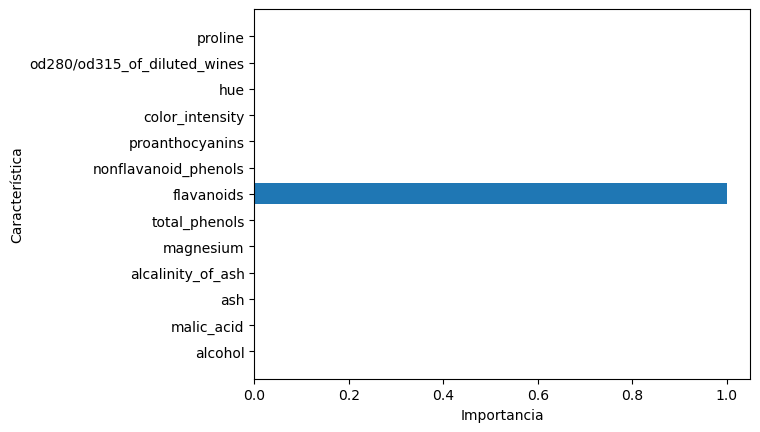

In [13]:
# Evalúo la importancia que el modelo otorga a cada feature

caracteristica=wine.data.shape[1]
plt.barh(range(caracteristica),arbol_optimo_scaled.feature_importances_)
plt.yticks(np.arange(caracteristica),wine.feature_names)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

### 4) Tome los datos escalados y/o normalizados, reduzca la dimensión del problema a 2 utilizando PCA y grafique el conjunto resultante.

In [14]:
import mglearn
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(x_scaled)
x_pca=pca.transform(x_scaled)

print("shape of X_pca", x_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:2]))


shape of X_pca (178, 2)
[0.40749485 0.18970352]
suma: 0.5971983633884049


### Se observa que gracias al análisis por PCA se redujo la dimensionalidad de 13 a 2 variables logrando explicar con solo dos variables el 59.7 % de la variación en las etiquetas.

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

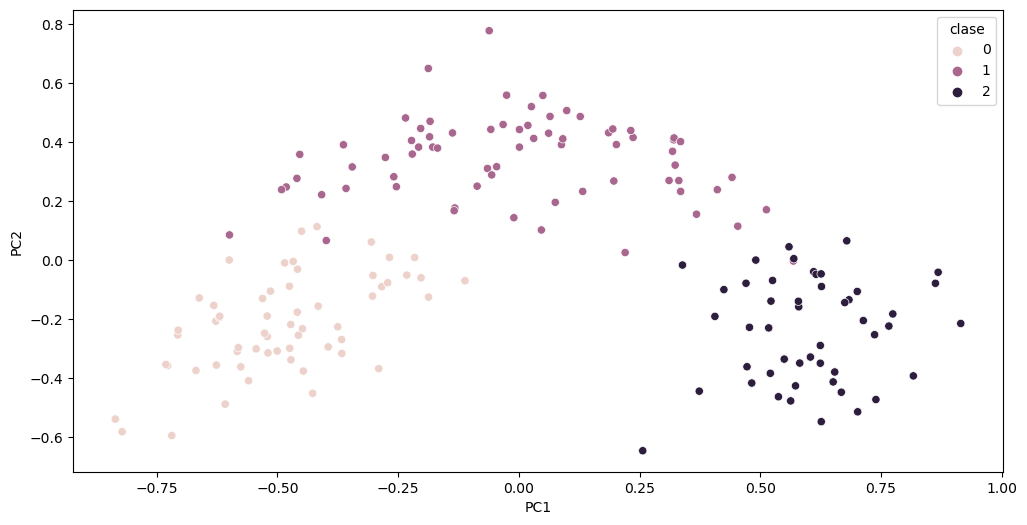

In [15]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
import seaborn as sns
componentsDf = pd.DataFrame(data= x_pca, columns = ['PC1', 'PC2'])
clase=np.array(wine.target)
componentsDf['clase'] = clase.tolist()

plt.figure(figsize=(12, 6))
sns.scatterplot( x='PC1', y='PC2',data=componentsDf,hue='clase')

### 5) Sin utilizar las etiquetas del dataset, elija un valor de K y aplique el algoritmo de KMeans sobre los datos transformados por PCA. Repita el procedimiento utilizando KMeans por mini-batches.

0.8470966807514034
Wall time: 109 ms


KMeans(max_iter=2000, n_clusters=3)

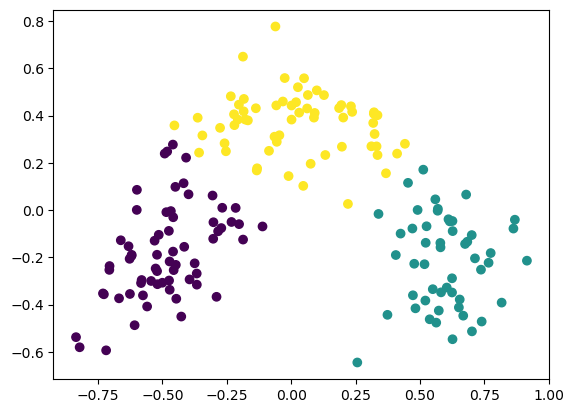

In [16]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from timeit import timeit

# Aplico Kmeans sobre los datos transformados por PCA

etiquetas = wine.target
k_means = KMeans(n_clusters=3, max_iter=2000)
k_means.fit(x_pca)
predicciones=k_means.predict(x_pca)
score=metrics.adjusted_rand_score(etiquetas, predicciones)
print(score)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=predicciones)
%time k_means.fit(x_pca)

C:\Users\pfard\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


0.86494782721085


C:\Users\pfard\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Wall time: 1.64 s


MiniBatchKMeans(max_iter=2000, n_clusters=3)

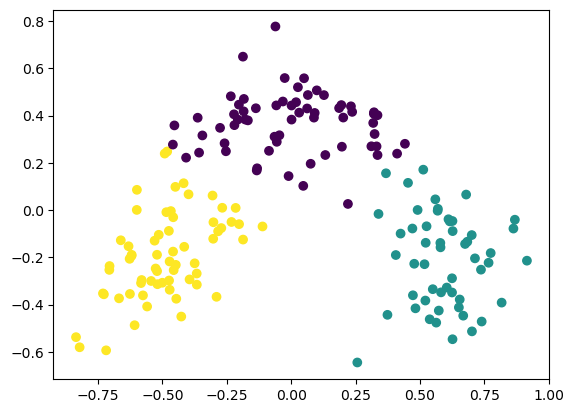

In [17]:
## Aplico Kmeans por mini batches

kmeans_mini = MiniBatchKMeans(n_clusters=3, max_iter=2000)
kmeans_mini.fit(x_pca)
predicciones_mini = kmeans_mini.predict(x_pca)
score=metrics.adjusted_rand_score(etiquetas, predicciones_mini)
print(score)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=predicciones_mini)
%time kmeans_mini.fit(x_pca)

### Gracias a la reducción de la dimensionalidad con PCA usando K Means puedo tener el 84.7 % de precisión con solo dos variables y usando mini batches puedo tener un tiempo de ejecución mas rápido. 